# Initialization

## Install Packages

In [ ]:
install.packages("outliers")
install.packages("lmtest")
install.packages("car")
install.packages("MASS")
install.packages("mgcv")
install.packages ("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Attach packages to runtime

In [ ]:
library (dplyr)
library (readr)
library (ggplot2)
library (outliers)
library(lmtest)
library(car)
library(MASS)
library(mgcv)
library(stats)
library (Metrics)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-41. For overview type 'help("mgcv-package")'.



## Data Cleaning

In [ ]:
nigerian_cars <- read_csv("Nigerian_Car_Prices.csv")
clean_car <- na.omit(nigerian_cars)
clean_car <- dplyr :: select(clean_car, -1, -Build)
colnames(clean_car)[2] <- "Year"
colnames(clean_car)[5] <- "Engine"

head(clean_car)

New names:
• `` -> `...1`
Rows: 4095 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Make, Condition, Fuel, Transmission, Build
dbl (4): ...1, Year of manufacture, Mileage, Engine Size
num (1): Price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Lexus,2011,Nigerian Used,105546,4600,Petrol,Automatic,14040000
Toyota,2014,Nigerian Used,216924,2500,Petrol,Automatic,9360000
Toyota,2014,Nigerian Used,216924,2500,Petrol,Automatic,9360000
Lexus,2016,Nigerian Used,107355,5700,Petrol,Automatic,42000000
Mercedes-Benz,2007,Foreign Used,209466,4700,Petrol,Automatic,4515000
Lexus,2010,Foreign Used,135819,3500,Petrol,Automatic,8610000


# 1. Uji Asumsi

Uji hypothesis menggunakan asumsi h_0 dan h_1

- https://dosen.perbanas.id/wp-content/uploads/wp-post-to-pdf-enhanced-cache/1/regresi-data-panel-2-tahap-analisis.pdf

(Iqbal, M. (2015). Regresi Data Panel (2): Tahap Analisis. Retrived From https://dosen. perbanas. id/regresi-data-panel-2-tahap-analisis.)

- http://repository.umy.ac.id/bitstream/handle/123456789/23215/H.%20BAB%20V.pdf?sequence=8&isAllowed=y

BAB, V. A. Uji Asumsi Klasik.




## 1.1 Analisis Regresi

In [ ]:
linear = lm (Price ~ Year + Mileage + Engine, data = clean_car)
summary(linear)


Call:
lm(formula = Price ~ Year + Mileage + Engine, data = clean_car)

Residuals:
     Min       1Q   Median       3Q      Max 
-9554288 -2437504  -776341  1539452 41413473 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.961e+09  7.401e+07 -26.501   <2e-16 ***
Year         9.796e+05  3.682e+04  26.604   <2e-16 ***
Mileage     -1.274e+00  1.055e+00  -1.207    0.228    
Engine      -4.299e+00  4.423e+01  -0.097    0.923    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5032000 on 1097 degrees of freedom
Multiple R-squared:  0.4247,	Adjusted R-squared:  0.4231 
F-statistic: 269.9 on 3 and 1097 DF,  p-value: < 2.2e-16


Dapat terlihat bahwa hubungan variabel dependent (price) dengan variabel independent [numerical variabel] (Year, Mileage, Engine), memiliki hubungan yang erat terlihat dari data summary **p-value** dan **R^2**

---



## 1.2 Uji Normalitas Residual

H0 =  berdistribusi normal

In [ ]:
shapiro.test(linear$residuals)


	Shapiro-Wilk normality test

data:  linear$residuals
W = 0.73725, p-value < 2.2e-16


Dari hasil uji normalitas residual menggunakan Shapiro-Wilk normality test terlihat bahwa **p-value < alpha (0.05)** sehingga data tersebut **tidak berdistribusi normal**


---



## 1.3 Uji Autokorelasi

H0 = tidak terjadi autokorelasi

In [ ]:
dwtest(linear)


	Durbin-Watson test

data:  linear
DW = 2.0074, p-value = 0.547
alternative hypothesis: true autocorrelation is greater than 0


Dari hasil uji autokorelasi menggunakan Durbin-Watson test terlihat bahwa **p-value > alpha (0.05)** sehingga dalam data tersebut **tidak terjadi autokorelasi**

---



## 1.4 Uji Homogenitas

H0 = data homogen (nilai varians konstan)

In [ ]:
bptest(linear, studentize = FALSE)


	Breusch-Pagan test

data:  linear
BP = 1176.7, df = 3, p-value < 2.2e-16


Dari hasil uji homgenitas menggunakan Breusch-Pagan test terlihat bahwa **p-value < alpha (0.05)** sehingga **terjadi homogenitas** dalam data tersebut.
Karena terjadi homogenitas dalam data tersebut, **nilai variansi** data-data tersebut **sama**.


---



## 1.5 Uji Multikolinearitas

H0 = tidak terjadi multikolinearitas

In [ ]:
vif(linear)

Year  Mileage   Engine 
1.110282 1.110075 1.000274

Dari hasil uji multikolinearitas diatas, terlihat bahwa setiap nilai **VIF < 10**, sehingga dalam data tersebut **tidak ada masalah multikolinearitas**

---



# 2. Hypothesis


## 2.1. Grubbs Outlier Test

### 2.1.1. Price

In [ ]:
grubbs.test(clean_car$Price)


	Grubbs test for one outlier

data:  clean_car$Price
G = 7.98918, U = 0.94192, p-value = 2.445e-13
alternative hypothesis: highest value 58800000 is an outlier


In [ ]:
outlierPrice <- clean_car$Price

QPrice <- quantile(outlierPrice, probs=c(.25, .75), na.rm = FALSE)
IQRPrice <- IQR(outlierPrice)

LPrice <- QPrice[1] - (1.5 * IQRPrice)
UPrice <- QPrice[2] + (1.5 * IQRPrice)

clean_car <- subset(clean_car, outlierPrice > LPrice & outlierPrice < UPrice)

### 2.1.2. Mileage

In [ ]:
grubbs.test(clean_car$Mileage)


	Grubbs test for one outlier

data:  clean_car$Mileage
G = 16.03221, U = 0.74142, p-value < 2.2e-16
alternative hypothesis: highest value 2671736 is an outlier


In [ ]:
outlierMileage <- clean_car$Mileage

QMileage <- quantile(outlierMileage, probs=c(.25, .75), na.rm = FALSE)
IQRMileage <- IQR(outlierMileage)

LMileage <- QMileage[1] - (1.5 * IQRMileage)
UMileage <- QMileage[2] + (1.5 * IQRMileage)

clean_car <- subset(clean_car, outlierMileage > LMileage & outlierMileage < UMileage)

### 2.1.3. Engine

In [ ]:
grubbs.test(clean_car$Engine)


	Grubbs test for one outlier

data:  clean_car$Engine
G = 13.36222, U = 0.81725, p-value < 2.2e-16
alternative hypothesis: highest value 50000 is an outlier


In [ ]:
outlierEngine <- clean_car$Engine

QEngine <- quantile(outlierEngine, probs=c(.25, .75), na.rm = FALSE)
IQREngine <- IQR(outlierEngine)

LEngine <- QEngine[1] - (1.5 * IQREngine)
UEngine <- QEngine[2] + (1.5 * IQREngine)

clean_car <- subset(clean_car, outlierEngine > LEngine & outlierEngine < UEngine)

# 3. Linear Regression Models

## 3.1. Linear Regersion menggunakan Metode lm ()

### 3.1.1. Summary of Linear Models

In [ ]:
clean_car2 <- dplyr :: select (clean_car, c("Year", "Price", "Engine","Mileage"))

linearPrice = lm (Price~Year , data = clean_car2)
summary (linearPrice)


Call:
lm(formula = Price ~ Year, data = clean_car2)

Residuals:
     Min       1Q   Median       3Q      Max 
-4852811 -1231889  -144922   977925  5497848 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -928141676   32589676  -28.48   <2e-16 ***
Year            464341      16232   28.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1710000 on 768 degrees of freedom
Multiple R-squared:  0.5159,	Adjusted R-squared:  0.5152 
F-statistic: 818.3 on 1 and 768 DF,  p-value: < 2.2e-16


### 3.1.2. Graph of Linear Models

`geom_smooth()` using formula = 'y ~ x'


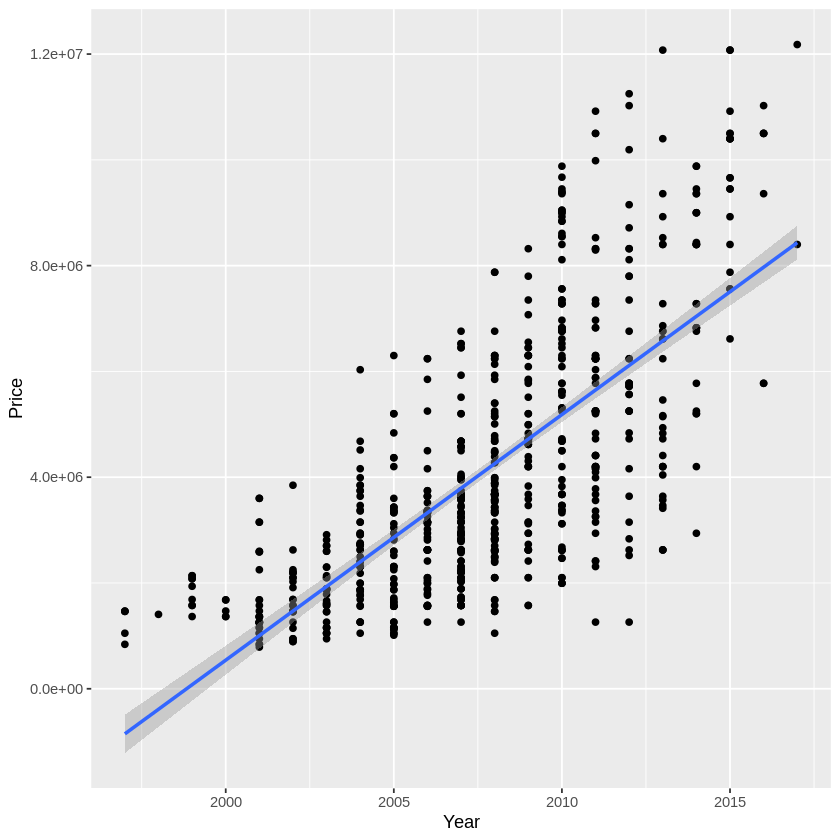

In [ ]:
ggplot (clean_car, aes(x = Year , y = Price)) +
  geom_point () +
  geom_smooth (method = lm)

## 3.2. Linear Regression Menggunakan Metode Loess

### 3.2.1. Summary of Loess Method

In [ ]:
summaryLoess <- loess(Price ~ Year, data = clean_car2)
print(summary (summaryLoess))

Call:
loess(formula = Price ~ Year, data = clean_car2)

Number of Observations: 770 
Equivalent Number of Parameters: 5.15 
Residual Standard Error: 1635000 
Trace of smoother matrix: 5.63  (exact)

Control settings:
  span     :  0.75 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 


### 3.2.2. Graph of Loess Method

`geom_smooth()` using formula = 'y ~ x'


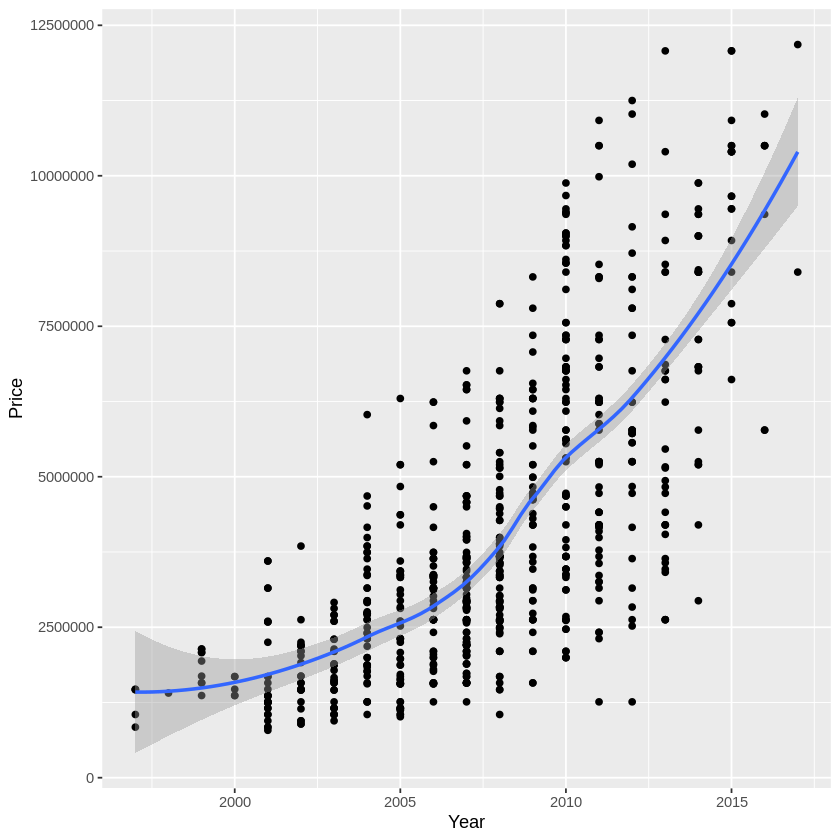

In [ ]:
ggplot (clean_car2, aes(x = Year , y = Price)) +
  geom_point () +
  geom_smooth (aes(x = Year, y = Price), method = stats::loess)

## 3.3. Linear Regression Menggunakan Metode Robust Fitting of Linear Models


### 3.3.1. Summary of Robust Fitting of Linear Method

In [ ]:
summaryRlm <- summary(rlm(Price ~ Year, data = clean_car2))
summaryRlm


Call: rlm(formula = Price ~ Year, data = clean_car2)
Residuals:
     Min       1Q   Median       3Q      Max 
-4690346 -1146275   -75247  1066028  5679016 

Coefficients:
            Value         Std. Error    t value      
(Intercept) -8.906721e+08  3.202732e+07 -2.780980e+01
Year         4.456374e+05  1.595209e+04  2.793600e+01

Residual standard error: 1666000 on 768 degrees of freedom

### 3.3.2. Graph of Robust Fitting of Linear Method

`geom_smooth()` using formula = 'y ~ x'


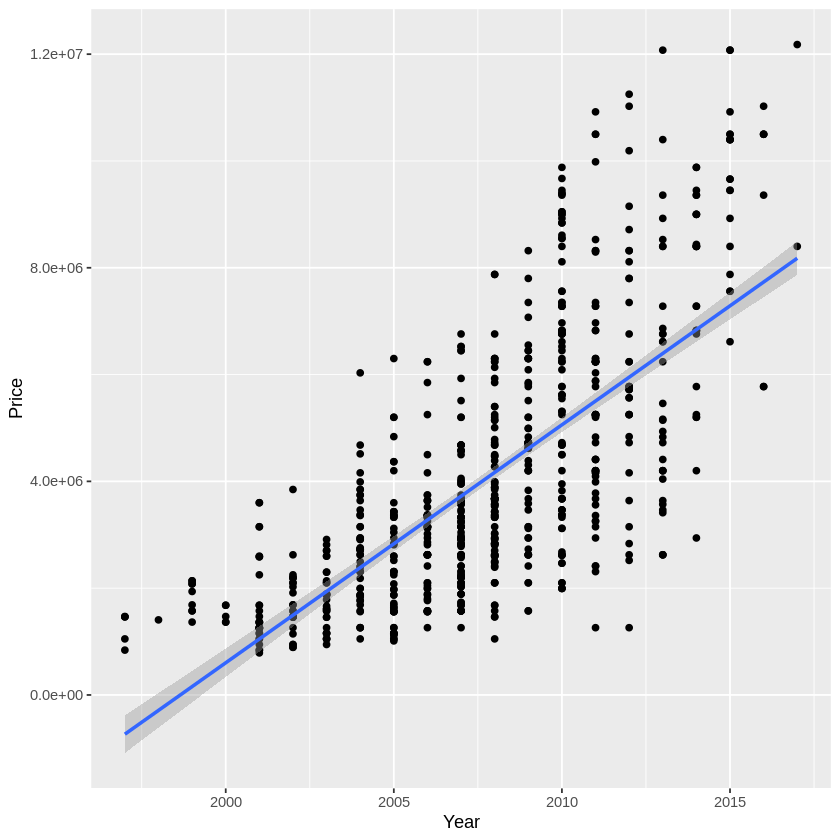

In [ ]:
ggplot (clean_car2, aes(x = Year , y = Price)) +
  geom_point () +
  geom_smooth (aes(x = Year, y = Price), method = MASS::rlm)

# 4. Measurements

## 4.1. R Squared

In [ ]:
summary(linear)$r.squared

[1] 0.4246897

## 4.2. Mean Squared Error

In [ ]:
mean (summary(linearPrice)$residuals^2)

[1] 2.917262e+12

## 4.3. Mean Absolute Error

In [ ]:
meanAbsEr <- Metrics :: mae (clean_car2$Price, predict(linear))
meanAbsEr

Warning message in actual - predicted:
“longer object length is not a multiple of shorter object length”


[1] 4124242